In [1]:
path = "MDA/Termin 7/Data/metadata_df.csv" #path 是文件路径  

In [2]:
from uutils import data_importer

In [3]:
import geopandas as gpd
import pandas as pd
from datetime import datetime #python 自带的包，跟geopandas ,pandas 一样
import glob

In [17]:
def metadata_importer(path):
	with open(path, 'r') as f:
		df = pd.read_csv(f)

	# change user id from float to str
	df['user_id'] = list(map(lambda x: '0' * (3 - len(str(int(x)))) + str(int(x)), df['user_id']))

	# change datetime from str to datetime.datetime
	df['datetime'] = list(map(lambda s: datetime.strptime(s, '%Y-%m-%d %H:%M:%S'), df['end_time'].values))

	print('Metadata import complete!')
	return df

In [18]:
df = metadata_importer(path)

Metadata import complete!


In [19]:
df

,average_speed,average_acceleration,max_speed,max_acceleration,mode,user_id,end_time,datetime
0,63.956277,0.001430,118.710639,0.068488,train,010,2008-03-28 22:01:19,2008-03-28 22:01:19
1,74.221753,0.001588,117.506273,0.074917,train,010,2008-03-29 10:03:00,2008-03-29 10:03:00
2,75.022218,0.001541,115.419248,0.073340,train,010,2008-03-29 16:33:24,2008-03-29 16:33:24
3,79.359841,0.004979,110.806526,0.064658,train,010,2008-03-30 02:46:32,2008-03-30 02:46:32
4,60.461406,0.056342,116.947948,0.072975,train,010,2008-03-30 04:16:59,2008-03-30 04:16:59
...,...,...,...,...,...,...,...,...
13220,25.242507,0.011228,50.753643,1.103164,bus,179,2008-11-17 07:06:14,2008-11-17 07:06:14
13221,5.423305,-0.008702,11.321320,0.815151,walk,179,2008-11-17 07:14:32,2008-11-17 07:14:32
13222,34.189215,0.015964,60.632991,1.639953,bus,179,2008-11-29 02:01:37,2008-11-29 02:01:37
13223,3.736127,-0.016841,8.689323,0.390340,walk,179,2008-11-29 02:05:43,2008-11-29 02:05:43


In [21]:
print(df['mode'].unique())

['train' 'taxi' 'walk' 'bus' 'subway' 'airplane' 'car' 'bike' 'boat' 'run'
 'motorcycle']


In [34]:
# Separat independent features and dependant feature(target)

feature1 = df.columns[0]
feature2 = df.columns[1]
feature3 = df.columns[2]
feature4 = df.columns[3]
                   
target = df.columns[4]                      # Species 这里的features 对应选取多少个列，3，4，5，

print('Features:',feature1,feature2,feature3,feature4)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,:4]                  # slicing: all rows and 0 to 3 cols （slicing:限制 这里选取对应的列，3个或4个，5个也行

# store response vector in "y"      
y = df.iloc[:,4]                            # slicing: all rows and 4th col 选取Mode 的列


print(X)
print(y.shape)

Features: average_speed average_acceleration max_speed max_acceleration
Target: mode
       average_speed  average_acceleration   max_speed  max_acceleration
0          63.956277              0.001430  118.710639          0.068488
1          74.221753              0.001588  117.506273          0.074917
2          75.022218              0.001541  115.419248          0.073340
3          79.359841              0.004979  110.806526          0.064658
4          60.461406              0.056342  116.947948          0.072975
...              ...                   ...         ...               ...
13220      25.242507              0.011228   50.753643          1.103164
13221       5.423305             -0.008702   11.321320          0.815151
13222      34.189215              0.015964   60.632991          1.639953
13223       3.736127             -0.016841    8.689323          0.390340
13224      41.754385             -0.001604   81.382943          0.751639

[13225 rows x 4 columns]
(13225,)


In [35]:
# Convert response variable 'Species' to numbers and add this column  这里改个名字就行了，df改成gdf
# Necessary for the model training in the next step 

# Read more: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# new col
df['EncodedSpecies'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.head(10)

Classes: ['airplane' 'bike' 'boat' 'bus' 'car' 'motorcycle' 'run' 'subway' 'taxi'
 'train' 'walk']
Response variable after encoding: [ 9  9  9 ...  3 10  7]


,average_speed,average_acceleration,max_speed,max_acceleration,mode,user_id,end_time,datetime,EncodedSpecies
0,63.956277,0.001430,118.710639,0.068488,train,010,2008-03-28 22:01:19,2008-03-28 22:01:19,9
1,74.221753,0.001588,117.506273,0.074917,train,010,2008-03-29 10:03:00,2008-03-29 10:03:00,9
2,75.022218,0.001541,115.419248,0.073340,train,010,2008-03-29 16:33:24,2008-03-29 16:33:24,9
3,79.359841,0.004979,110.806526,0.064658,train,010,2008-03-30 02:46:32,2008-03-30 02:46:32,9
4,60.461406,0.056342,116.947948,0.072975,train,010,2008-03-30 04:16:59,2008-03-30 04:16:59,9
5,80.966227,0.004012,117.233138,0.079556,train,010,2008-03-30 07:55:28,2008-03-30 07:55:28,9
6,103.415071,0.017394,111.463037,0.033182,train,010,2008-03-30 08:58:19,2008-03-30 08:58:19,9
7,10.313803,0.027118,19.568245,0.051790,train,010,2008-03-30 09:09:42,2008-03-30 09:09:42,9
8,61.650801,0.000207,108.011374,0.051775,train,010,2008-03-30 19:41:56,2008-03-30 19:41:56,9
9,47.696436,0.069951,105.567567,0.029216,train,010,2008-03-30 23:25:31,2008-03-30 23:25:31,9


In [37]:
# Split X and y into training and testing sets

# Read more: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4) #0.4 表示4—6分。取40% 
# 0.4这里改成0.1或0.2

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Search for the K observations in the training data that are "nearest" to  Class 是等于11 是mode
# the measurements of the unknown iris.

from sklearn.neighbors import KNeighborsClassifier

# Pick a value for K.
n_neighbors = 37

# create an instance of Neighbours Classifier and fit the data / train the model
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [52]:
#Evaluation classification accuracy

from sklearn import metrics

knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.7112622826908541

result of k = 10: 0.7082388510959939
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 11: 0.7067271352985639
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 12: 0.6991685563114135
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 13: 0.7044595616024187
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 14: 0.7029478458049887
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 15: 0.7029478458049887
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 16: 0.7052154195011338
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 17: 0.7044595616024187
until now, max value is 0.7082388510959939 at k = 10
-----------------------
result of k = 18: 0.7006802721088435
until now, max value is 0.7082388510959939 at k = 1

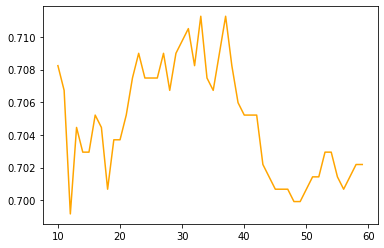

In [53]:
# check best of K

from sklearn import metrics
v=[]
k_range = list(range(10, 60,)) #


max_value = 0
max_k = 0
for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  # fit the model with data
  knn.fit(X_train, y_train)
  k_pred = knn.predict(X_test)
  v.append(metrics.accuracy_score(y_test, k_pred))
  print('result of k = {}: {}'.format(i, v[-1]))

  if v[-1] > max_value:   #是for循环当前的结果与之前max的结果比较
    max_value = v[-1]
    max_k = i
  
  print('until now, max value is {} at k = {}'.format(max_value, max_k))
  print('-----------------------')

import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()